In [90]:
import h5py
import numpy as np
import pandas as pd
import os
import imageio

In [2]:
h5_dir = r'C:\Users\U3RWHITE\Desktop\KiTech'
f = h5py.File(os.path.join(h5_dir,'KITECH.h5'), 'r')

In [3]:
list(f.keys())

['AbsorptionCT', 'Date', 'LabDCT', 'PhaseInfo', 'ProjectInfo', 'Version']

In [4]:
list(f['LabDCT'].keys())

['Center', 'Data', 'Extend', 'Spacing', 'VirtualShift']

In [5]:
DCT_data = f['LabDCT']['Data']

In [6]:
list(DCT_data.keys())

['Completeness', 'GrainId', 'IPF001', 'PhaseId', 'Rodrigues']

In [7]:
DCT_grains = DCT_data['GrainId'][()] #get values from HDF5

In [8]:
print(DCT_grains.max())
print(DCT_grains.min())
print(DCT_grains.shape)

475
0
(86, 144, 144)


In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [10]:
def get_grain_location(data, grain_id):
    locations = np.asarray(np.where(data == grain_id))
    
    return locations

In [24]:
grain = get_grain_location(DCT_grains, 57)

In [25]:
grain

array([[  0,   0,   0, ...,  85,  85,  85],
       [ 50,  51,  51, ...,  99, 100, 100],
       [ 82,  81,  83, ...,  88,  74,  75]], dtype=int64)

In [26]:
blank_im = np.zeros_like(DCT_grains)

In [27]:
blank_im[tuple(grain)] = 255

<IPython.core.display.Javascript object>


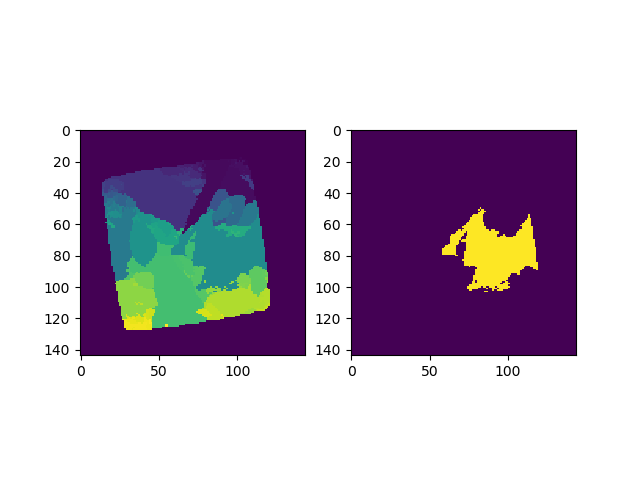

In [28]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(DCT_grains[0,:,:])
ax[1].imshow(blank_im[0,:,:])

plt.show()

In [29]:
DCT_colours = DCT_data['IPF001'][()] #get values from HDF5

In [31]:
DCT_colours.shape

(86, 144, 144, 3)

In [38]:
DCT_colours[tuple(grain)].mean(axis=0)

array([1.        , 0.12595284, 0.08300315], dtype=float32)

In [43]:
blank_im = np.zeros_like(DCT_colours)
for grain_id in range(DCT_grains.max()+1):
    grain = get_grain_location(DCT_grains, grain_id)
    avg_colour = DCT_colours[tuple(grain)].mean(axis=0)
    blank_im[tuple(grain)] = avg_colour

<IPython.core.display.Javascript object>


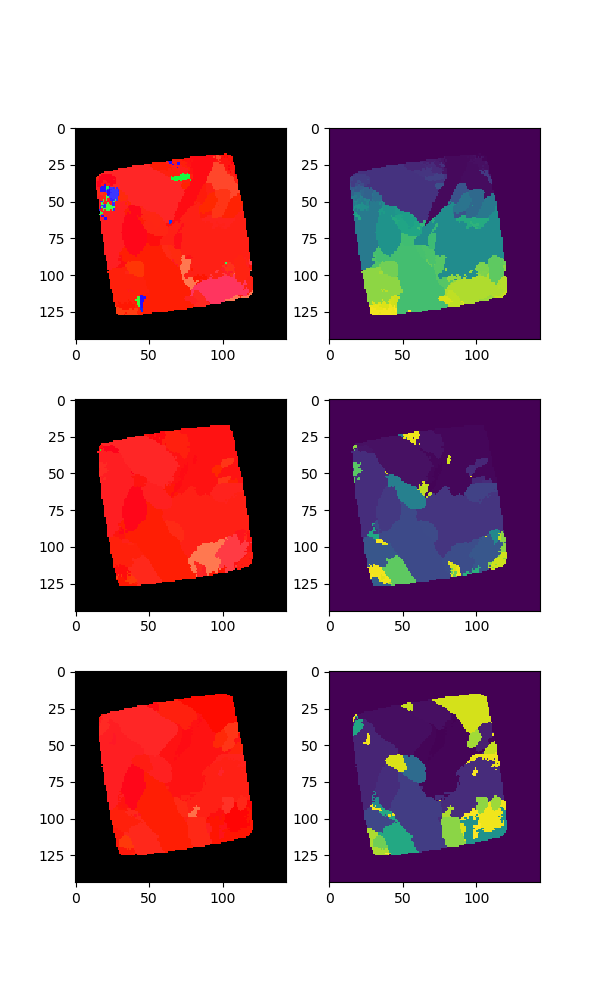

In [72]:
fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(6, 10))
ax[0,0].imshow(blank_im[0,:,:])
ax[1,0].imshow(blank_im[40,:,:])
ax[2,0].imshow(blank_im[80,:,:])
ax[0,1].imshow(DCT_grains[0,:,:])
ax[1,1].imshow(DCT_grains[40,:,:])
ax[2,1].imshow(DCT_grains[80,:,:])
plt.show()

In [53]:
flattened_imgs = DCT_colours.reshape((-1,3))
colours = np.unique(flattened_imgs, axis=0)

In [55]:
len(colours)

416

In [56]:
#Function that creates a greyscale image of lookup values for all unique colours in image stack
def indexing_func(key_list, value_list):
    key_map = {tuple(key): i for i, key in enumerate(key_list)}
    result = np.array([key_map[tuple(value)] for value in value_list])
    return result

In [57]:
indexed_imgs = indexing_func(colours, flattened_imgs)

In [64]:
indexed_imgs = indexed_imgs.reshape((DCT_colours.shape[0:3]))
indexed_imgs.shape

(86, 144, 144)

<IPython.core.display.Javascript object>


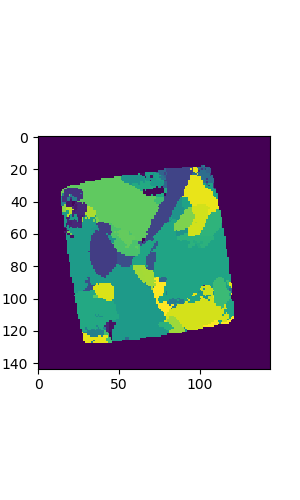

In [73]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.imshow(indexed_imgs[0])
plt.show()

<IPython.core.display.Javascript object>


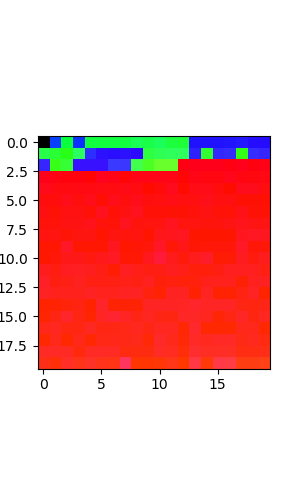

In [87]:
fig, ax = plt.subplots(figsize=(3, 5))
factor = len(colours) - int(np.sqrt(len(colours)))*int(np.sqrt(len(colours)))
step = 1
plt.imshow(colours[:-factor:step].reshape((int(np.sqrt(len((colours)-factor)/step)),int(np.sqrt(len((colours)-factor)/step)),-1)))
plt.show()

In [92]:
cwd = os.getcwd()
for i in range(len(indexed_imgs)):
    imageio.imwrite(os.path.join(cwd,'Indexed','indexed'+str(i)+'.tif'), indexed_imgs[i,:,:].astype(np.uint16))
np.save(os.path.join(cwd,'colours.npy'), colours)